# Visualization of ET Scenes in 3D

Imports.

In [1]:
%matplotlib widget

import kiruna.device as device
import kiruna.scene as scene
import kiruna.user as user
import kiruna.visualization.scene_visualization as scene_visualization
import matplotlib.pyplot as plt
import os
import utils

dropdown_widget = utils.get_experiment_info(save_results=False)

RadioButtons(description='Device:', index=4, options=('atlas_1.2', 'palau', 'sydney', 'tasman', 'p47', 'p47_PO…

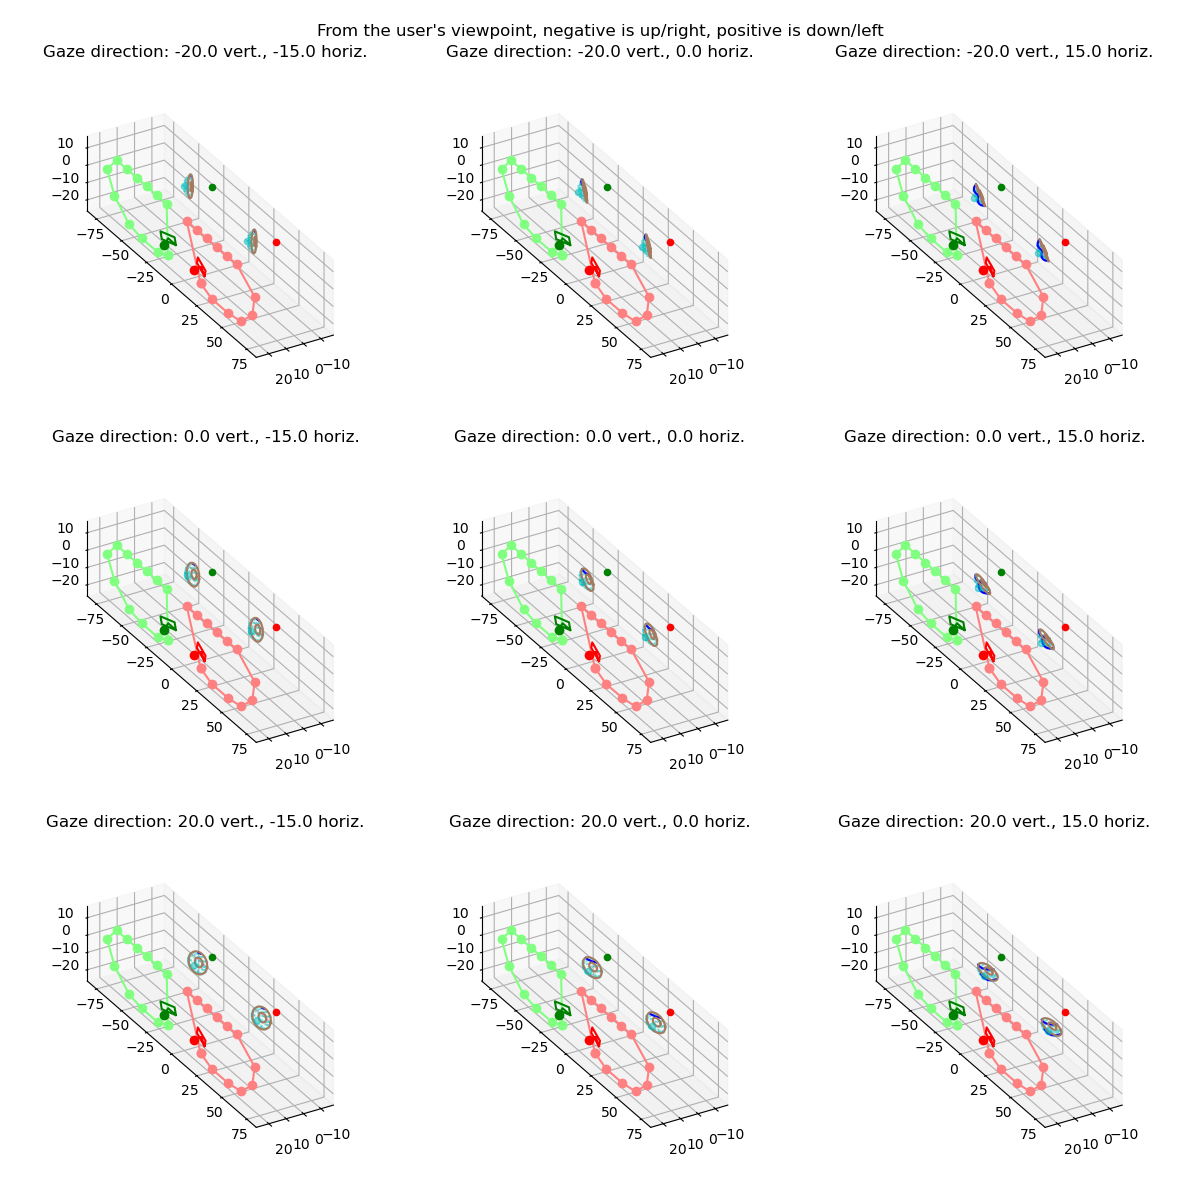

In [2]:
# Create a scene.
scene_file_name, _ = \
    utils.get_configuration_files(dropdown_widget.value)  # type: ignore

et_scene = scene.SceneModel(parameter_file_name=scene_file_name)

# (rotation around x, rotation around y)
# Create axes.
fig = plt.figure(figsize=(12, 12))

for j, rot_around_y in enumerate([-20., 0., 20.]):  # Horizontal rotation
    for i, rot_around_x in enumerate([-15., 0., 15.]):  # Vertical rotation
        angles = (rot_around_y, rot_around_x)
        for eye in et_scene.user.eyes:
            eye.rotate_from_gaze_angles_inParent(angles)

        # Setting the vertical_axis to y is important, otherwise the method
        # core_visualization.NodeVisualization.adjust that is internally called for
        # axes_3D will screw up with aspect ratios.
        axs_3D = \
            fig.add_subplot(
                3,
                3,
                3*j + i + 1,
                projection="3d",
                proj_type="ortho",
                computed_zorder=True
            )
        axs_3D.view_init(azim=60, elev=30, vertical_axis="y")

        # Visualize the scene.
        et_scene_visualization = \
            scene_visualization.SceneModelVisualization(
                et_scene, axs_3D, visualization_node=et_scene
            )

        et_scene_visualization.visualize()

        axs_3D.set_title(
            "Gaze direction: {0:.1f} vert., {1:.1f} horiz.".format(*angles))

        for eye in et_scene.user.eyes:
            eye.unrotate_from_gaze_angles_inParent(angles)

fig.suptitle("From the user's viewpoint, negative is up/right, positive is down/left")
plt.tight_layout()
plt.show()

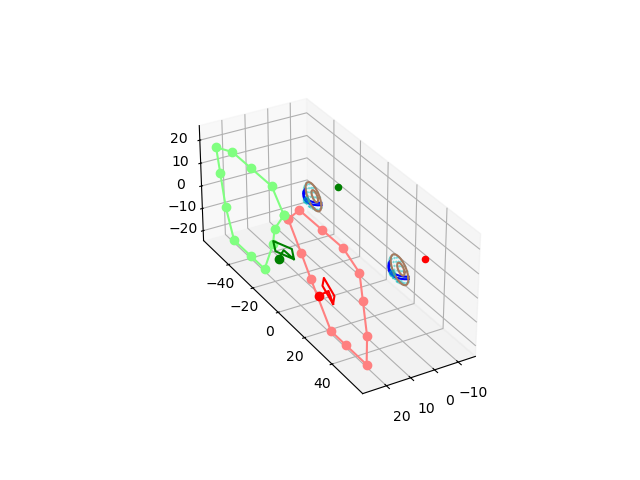

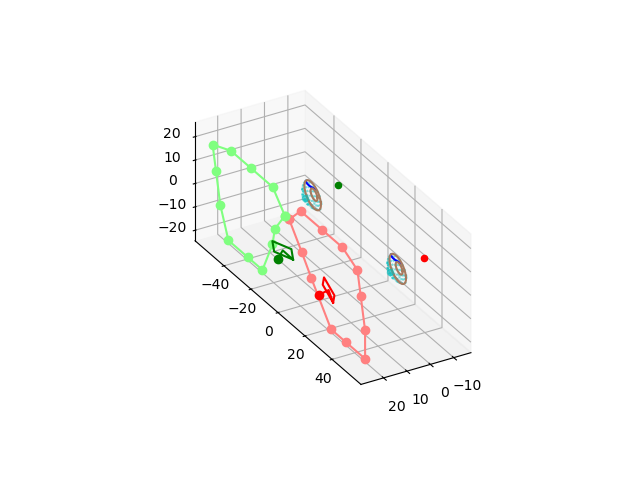

In [27]:
# Create axes.
fig = plt.figure()
axes_3D = fig.add_subplot(projection="3d", computed_zorder=True)

###############################################################################
# Close the eyes. Give them a real squint.
for eye in et_scene.user.eyes:
    eye.eyelids.rotate_eyelid(20, upper=True)
    eye.eyelids.rotate_eyelid(-25, upper=False)

# Setting the vertical_axis to y is important, otherwise the method
# core_visualization.NodeVisualization.adjust that is internally called for
# axes_3D will screw up with aspect ratios.
axes_3D.view_init(azim=60, elev=30, vertical_axis="y")

# Visualize the scene.
et_scene_visualization = \
    scene_visualization.SceneModelVisualization(
        et_scene, axes_3D, visualization_node=et_scene
    )
et_scene_visualization.visualize()

###############################################################################
# Reopen the eyes.
for eye in et_scene.user.eyes:
    eye.eyelids.rotate_eyelid(-20, upper=True)
    eye.eyelids.rotate_eyelid(25, upper=False)

# Create new axes.
fig = plt.figure()
axes_3D = \
    fig.add_subplot(projection="3d", proj_type="ortho", computed_zorder=True)

# Setting the vertical_axis to y is important, otherwise the method
# core_visualization.NodeVisualization.adjust that is internally called for
# axes_3D will screw up with aspect ratios.
axes_3D.view_init(azim=60, elev=30, vertical_axis="y")

# Visualize the scene again, on new axes.
et_scene_visualization = \
    scene_visualization.SceneModelVisualization(
        et_scene, axes_3D, visualization_node=et_scene
    )

et_scene_visualization.visualize()

C:\Users\zacharyd\AppData\Local\Temp\ipykernel_19304\3238499889.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


Text(0.5, 0, 'z')

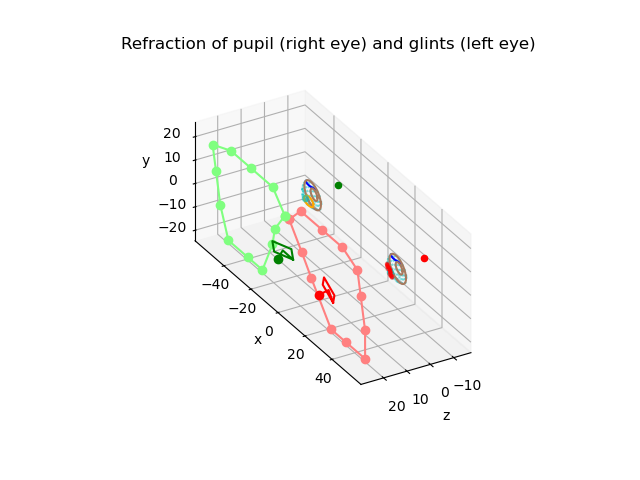

In [28]:
# Create axes.
fig = plt.figure()
axes_3D = \
    fig.add_subplot(projection="3d", proj_type="ortho", computed_zorder=True)

# Setting the vertical_axis to y is important, otherwise the method
# core_visualization.NodeVisualization.adjust that is internally called for
# axes_3D will screw up with aspect ratios.
axes_3D.view_init(azim=60, elev=30, vertical_axis="y")

# Visualize the scene.
et_scene_visualization = \
    scene_visualization.SceneModelVisualization(
        et_scene, axes_3D, visualization_node=et_scene
    )

# Visualize scene.
et_scene_visualization.visualize()

# Visualize glints
et_scene_visualization.visualize_glints()

# Visualize pupil on the non-default (right) eye, just for kicks.
et_scene_visualization.visualize_refracted_pupil(
    subsystem_index=1, num_points=100
)

axes_3D.set_title("Refraction of pupil (right eye) and glints (left eye)")
axes_3D.set_xlabel("x")
axes_3D.set_ylabel("y")
axes_3D.set_zlabel("z")